## Looking into basic statistics, from Kaggle data, focusing on US asylum seekers.

In [29]:
ls data/

affirmative_asylum.csv
asylum_statistics.csv
defensive_asylum.csv
refugee_statistics.csv
refugee_status.csv
unhcr_popstats_export_time_series_all_data.csv


In [130]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [20]:
path = './data'
aff_asylum = pd.read_csv(os.path.join(path, "affirmative_asylum.csv"),parsd)
asylum_statistics = pd.read_csv(os.path.join(path, "asylum_statistics.csv"))
def_asylum = pd.read_csv(os.path.join(path, "defensive_asylum.csv"))
refugee_status = pd.read_csv(os.path.join(path, "refugee_status.csv"))

In [21]:
refugee_statistics

,Sex/Age/Marital Status,Applicants,Spouses,Children,All Refugees
0,Female,"10,082","8,688","14,565","33,335"
1,Male,"18,317","2,104","16,163","36,584"
2,Sex Unknown,1,-,-,1
3,Under 16 Years,679,-,"24,309","24,988"
4,16 to 20 Years,"1,354",176,"5,376","6,906"
5,21 Years and Over,"26,367","10,616","1,043","38,026"
6,Under 1 Year,4,-,235,239
7,1 to 4 Years,118,-,"7,571","7,689"
8,5 to 9 Years,132,-,"8,138","8,270"
9,10 to 14 Years,316,-,"7,060","7,376"


In [28]:
refugee_status.head()

,Continent/Country of Nationality,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Africa,"18,129","17,486","8,943","9,678","13,325","7,693","10,629","15,984","17,501","22,492"
1,Asia,"10,086","23,564","44,819","58,309","52,695","44,583","44,416","48,840","47,197","43,115"
2,Europe,"9,615","4,192","2,059","1,693","1,238",996,908,482,818,"2,164"
3,North America,"3,145","2,922","4,177","4,800","4,856","2,930","1,948","4,206","4,066","1,528"
4,Oceania,-,-,-,-,-,-,-,-,-,-


In [24]:
aff_asylum.head(10)

,Continent/Country of Nationality,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Africa,"2,112","2,567","2,686","2,852","2,666","3,055","5,054","4,860","4,303","3,724"
1,Asia,"3,340","4,446","4,846","5,556","5,421","6,467","8,031","7,528","7,429","6,652"
2,Europe,553,672,755,812,729,961,"1,213",778,571,729
3,North America,"3,600","2,243","1,753","1,484","1,421","1,543","1,649","1,143","1,594","5,811"
4,Oceania,18,27,23,18,8,19,20,10,21,4
5,South America,"3,384","2,440","1,974","1,129",929,"1,327","1,423",846,630,911
6,Unknown,41,53,92,129,53,47,38,40,35,47
7,Afghanistan,9,43,45,80,113,119,157,96,105,156
8,Albania,44,33,32,33,27,18,21,14,31,22
9,Algeria,5,D,8,5,9,8,12,3,8,6


In [27]:
def_asylum.head(10)

,Continent/Country of Nationality,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Africa,"2,830","2,522","2,046","2,326","1,912","2,340","2,118","1,976","1,697","1,380"
1,Asia,"6,668","6,707","5,509","5,423","4,872","5,855","6,745","6,137","5,445","4,803"
2,Europe,"1,441","1,318","1,177",928,746,864,823,872,654,538
3,North America,"1,007","1,071","1,083",855,489,535,632,681,745,"1,299"
4,Oceania,45,25,36,32,16,23,20,9,7,8
5,South America,"1,226","1,132",975,646,392,406,269,216,203,170
6,Unknown,87,84,66,90,92,115,111,55,40,48
7,Afghanistan,25,22,28,7,5,18,34,16,18,13
8,Albania,497,421,324,213,103,101,72,71,66,75
9,Algeria,13,6,5,6,-,4,6,D,D,D


In [60]:
import re

In [92]:
df_da = def_asylum
df_da = df_da.set_index('Continent/Country of Nationality')
df_da = df_da.transpose()
df_da = df_da.apply(lambda x: [re.sub('[,-]','',x[i]) for i in range(len(x))])
df_da.replace(to_replace = '',value = np.nan)
df_da.fillna('median',inplace=True)

In [93]:
df_da

Continent/Country of Nationality,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Afghanistan,Albania,Algeria,...,Uganda,Ukraine,Uzbekistan,Venezuela,Vietnam,Yemen,Zimbabwe,Other,Unknown,Total
2006,2830,6668,1441,1007,45,1226,87,25,497,13,...,36,45,95,279,10,10,56,114,87,13304
2007,2522,6707,1318,1071,25,1132,84,22,421,6,...,50,40,74,317,10,8,97,103,84,12859
2008,2046,5509,1177,1083,36,975,66,28,324,5,...,33,59,67,306,7,8,68,114,66,10892
2009,2326,5423,928,855,32,646,90,7,213,6,...,28,26,65,192,10,7,69,93,90,10300
2010,1912,4872,746,489,16,392,92,5,103,,...,19,59,48,143,8,7,48,90,92,8519
2011,2340,5855,864,535,23,406,115,18,101,4,...,21,45,62,159,12,28,39,91,115,10138
2012,2118,6745,823,632,20,269,111,34,72,6,...,24,47,37,113,10,16,34,97,111,10718
2013,1976,6137,872,681,9,216,55,16,71,D,...,30,43,55,79,4,9,24,99,55,9946
2014,1697,5445,654,745,7,203,40,18,66,D,...,21,47,40,92,D,16,8,69,40,8791
2015,1380,4803,538,1299,8,170,48,13,75,D,...,10,39,23,34,D,8,D,55,48,8246


//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


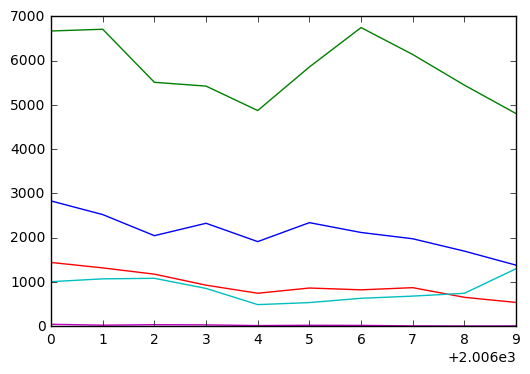

In [134]:
times = list(df_da.index)
plt.plot(df_da.iloc[:,0:5],label = )
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# title='Origin of individuals granted defensive asylum'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_d = pd.read_csv('./data/defensive_asylum.csv', sep=',', thousands=',', engine='python')

In [ ]:
df_da_total = df_d[df_d['Continent/Country of Nationality'] == 'Total']
df_da_total = df_da_total.set_index('Continent/Country of Nationality')
df_da_total = df_da_total.transpose()
df_da_total['Total'] = df_da_total['Total'].astype('float')
df_da_total.plot(title='Total number of individuals granted defensive asylum', legend=False, ylim=(0, 20000))
plt.show()

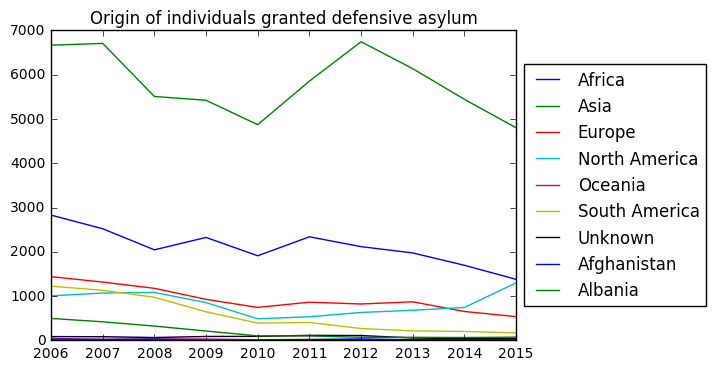

In [138]:
df_da = df_d
df_da = df_da[:9]
df_da = df_da.set_index('Continent/Country of Nationality')
df_da = df_da.transpose()
df_da = df_da.astype('float')
df_da.plot(title='Origin of individuals granted defensive asylum')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

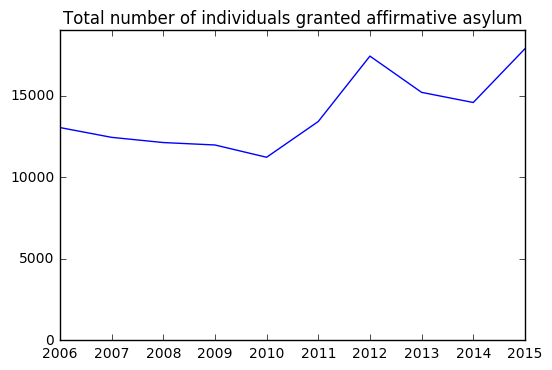

In [140]:
df_a = pd.read_csv('./data/affirmative_asylum.csv', sep=',', thousands=',', engine='python')
df_aa_total = df_a[df_a['Continent/Country of Nationality'] == 'Total']
df_aa_total = df_aa_total.set_index('Continent/Country of Nationality')
df_aa_total = df_aa_total.transpose()
df_aa_total = df_aa_total.astype('float')

df_aa_total.plot(title='Total number of individuals granted affirmative asylum', legend=False, ylim=(0, 19000))

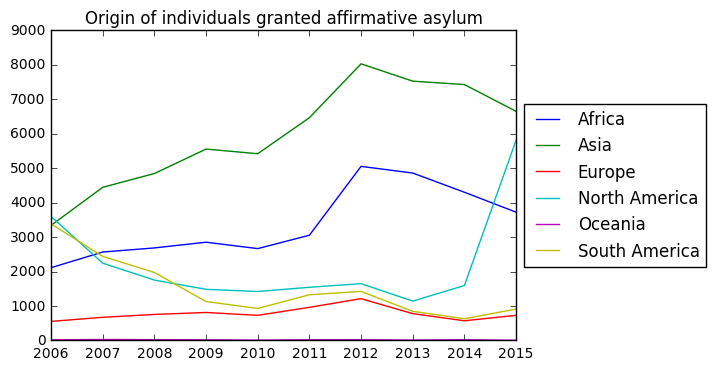

In [141]:
df_aa = df_a
df_aa = df_aa[:6]
df_aa = df_aa.set_index('Continent/Country of Nationality')
df_aa = df_aa.transpose()
df_aa = df_aa.astype('float')

df_aa.plot(title='Origin of individuals granted affirmative asylum')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))